In [2]:
import pandas as pd
import os

file_paths = [
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_AD.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_CTD.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_DD.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_MAD.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_NSE.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_SD.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_SE.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_SQA.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_SSA.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_TS.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_UX.csv',
    'C://CUB//sem2//ml//proj//cn//datasets//job_listings_WD.csv'
]

dfs = []

for file_path in file_paths:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dfs.append(df)
        print(f"Added data from {file_path}")
    else:
        print(f"File not found: {file_path}")

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    combined_file_path = 'datasets//combined_job_listings.csv'
    combined_df.to_csv(combined_file_path, index=False)
    print(f"All files have been combined into {combined_file_path}")
else:
    print("No files were combined, as no data frames were loaded.")


Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_AD.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_CTD.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_DD.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_MAD.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_NSE.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_SD.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_SE.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_SQA.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_SSA.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_TS.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_UX.csv
Added data from C://CUB//sem2//ml//proj//cn//datasets//job_listings_WD.csv
All files have been combined into datasets//combined_job_listings.csv


In [3]:
import pandas as pd

combined_job_listings = pd.read_csv('datasets//combined_job_listings.csv')
prediction_data = pd.read_csv('datasets//prediction-data.csv')

merged_data = pd.merge(combined_job_listings, prediction_data, left_on='title', right_on='SuggestedJobRole')

merged_data.to_csv('datasets//merged_dataset.csv', index=False)


In [4]:
import pandas as pd

combined_job_listings = pd.read_csv('datasets//combined_job_listings.csv')
prediction_data = pd.read_csv('datasets//prediction-data.csv')

combined_job_listings['title'] = combined_job_listings['title'].str.strip()
prediction_data['SuggestedJobRole'] = prediction_data['SuggestedJobRole'].str.strip()

combined_job_listings['title'] = combined_job_listings['title'].str.lower()
prediction_data['SuggestedJobRole'] = prediction_data['SuggestedJobRole'].str.lower()

merged_data = pd.merge(combined_job_listings, prediction_data, left_on='title', right_on='SuggestedJobRole', how='inner')

print(f"Merged Data Rows: {merged_data.shape[0]}")
if merged_data.shape[0] == 0:
    print("No matches found. Please check the unique values of the columns used for merging.")

merged_data.to_csv('datasets//merged_dataset.csv', index=False)


Merged Data Rows: 857591


In [5]:
import pandas as pd

combined_job_listings_path = 'datasets//combined_job_listings.csv'
combined_df = pd.read_csv(combined_job_listings_path)

filtered_df = combined_df[['title', 'requirements']]

filtered_df.rename(columns={'title': 'SuggestedJobRole'}, inplace=True)

filtered_file_path = 'datasets//filtered_job_listings.csv'
filtered_df.to_csv(filtered_file_path, index=False)

filtered_df.head(), filtered_file_path


C:\Users\vbhav\AppData\Local\Temp\ipykernel_47380\3671876224.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'title': 'SuggestedJobRole'}, inplace=True)


(         SuggestedJobRole                                       requirements
 0  Applications Developer  Bachelor's degree in Computer Science, Informa...
 1  Applications Developer  Bachelor Degree in Computer Science or similar...
 2  Applications Developer  Minimum of 8 years’ experience with ServiceNow...
 3  Applications Developer  Building and deploying scalable machine learni...
 4  Applications Developer  Bachelor’s degree in Business, Sales, Marketin...,
 'datasets//filtered_job_listings.csv')

In [6]:
if 'description' in filtered_df.columns:

    filtered_df['description'] = filtered_df['description'].str.strip()
    filtered_df['description'] = filtered_df['description'].str.replace(r'\s+', ' ', regex=True)


    filtered_df.head()
else:
    "No 'description' column found. Available columns are: " + ", ".join(filtered_df.columns)


In [7]:
import pandas as pd
import re

path = 'C://CUB//sem2//ml//proj//cn//datasets//filtered_job_listings.csv'

job_listings_df = pd.read_csv(path)

keywords = [
    'degree', 'bachelor', 'master', 'phd', 'diploma', 
    'computer science', 'engineering', 'business', 'economics', 'science', 'arts',
    'mba', 'b.sc', 'm.sc', 'ba', 'ma', 'bs', 'ms'
]

def extract_keywords(text):
    """ Extract specific keywords from the text. """
    text = text.lower()
    found_keywords = {word for word in keywords if word in text}
    return ', '.join(found_keywords)


job_listings_df['keywords'] = job_listings_df['requirements'].astype(str).apply(extract_keywords)


job_listings_df.drop('requirements', axis=1, inplace=True)


job_listings_df.to_csv(path, index=False)

print(job_listings_df.head())


         SuggestedJobRole                                           keywords
0  Applications Developer  engineering, degree, ba, computer science, ms,...
1  Applications Developer  degree, ba, business, computer science, ms, ma...
2  Applications Developer                 degree, ba, business, ma, bachelor
3  Applications Developer                  engineering, ba, business, ms, ma
4  Applications Developer                 degree, ba, business, ma, bachelor


In [8]:
import pandas as pd

filtered_listings_path = 'C://CUB//sem2//ml//proj//cn//datasets//filtered_job_listings.csv'
prediction_data_path = 'C://CUB//sem2//ml//proj//cn//datasets//prediction-data.csv'

filtered_listings_df = pd.read_csv(filtered_listings_path)
prediction_data_df = pd.read_csv(prediction_data_path)

combined_df = filtered_listings_df.merge(prediction_data_df, on='SuggestedJobRole', how='outer')

combined_df.to_csv('C://CUB//sem2//ml//proj//cn//datasets//combined1_job_listings.csv', index=False)

print(combined_df.head())


         SuggestedJobRole                                           keywords  \
0  Applications Developer  engineering, degree, ba, computer science, ms,...   
1  Applications Developer  engineering, degree, ba, computer science, ms,...   
2  Applications Developer  engineering, degree, ba, computer science, ms,...   
3  Applications Developer  engineering, degree, ba, computer science, ms,...   
4  Applications Developer  engineering, degree, ba, computer science, ms,...   

   Logical quotient rating  hackathons  coding skills rating  \
0                        5           0                     6   
1                        7           6                     4   
2                        2           3                     9   
3                        2           6                     3   
4                        2           0                     3   

   public speaking points self-learning capability? Extra-courses did  \
0                       2                       yes          

In [9]:
import pandas as pd

combined_df = pd.read_csv('C://CUB//sem2//ml//proj//cn//datasets//combined1_job_listings.csv')

cleaned_df = combined_df.dropna()

cleaned_df.to_csv('C://CUB//sem2//ml//proj//cn//datasets//cleaned_combined1_job_listings.csv', index=False)

print(cleaned_df.head())


         SuggestedJobRole                                           keywords  \
0  Applications Developer  engineering, degree, ba, computer science, ms,...   
1  Applications Developer  engineering, degree, ba, computer science, ms,...   
2  Applications Developer  engineering, degree, ba, computer science, ms,...   
3  Applications Developer  engineering, degree, ba, computer science, ms,...   
4  Applications Developer  engineering, degree, ba, computer science, ms,...   

   Logical quotient rating  hackathons  coding skills rating  \
0                        5           0                     6   
1                        7           6                     4   
2                        2           3                     9   
3                        2           6                     3   
4                        2           0                     3   

   public speaking points self-learning capability? Extra-courses did  \
0                       2                       yes          

In [10]:
combined_df.isnull().sum()

SuggestedJobRole                            0
keywords                               145396
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
reading and writing skills                  0
memory capability score                     0
Interested subjects                         0
interested career area                      0
Type of company want to settle in?          0
Taken inputs from seniors or elders         0
Interested Type of Books                    0
Management or Technical                     0
hard/smart worker                           0
worked in teams ever?                       0
Introvert                                   0
dtype: int64

In [11]:
combined_df= combined_df.dropna(subset=['keywords'])



In [12]:
combined_df.shape[0],combined_df.shape[1]

(712195, 21)

In [13]:
combined_df.isnull().sum()

SuggestedJobRole                       0
keywords                               0
Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
dtype: int64

In [14]:
combined_df.dtypes

SuggestedJobRole                       object
keywords                               object
Logical quotient rating                 int64
hackathons                              int64
coding skills rating                    int64
public speaking points                  int64
self-learning capability?              object
Extra-courses did                      object
certifications                         object
workshops                              object
reading and writing skills             object
memory capability score                object
Interested subjects                    object
interested career area                 object
Type of company want to settle in?     object
Taken inputs from seniors or elders    object
Interested Type of Books               object
Management or Technical                object
hard/smart worker                      object
worked in teams ever?                  object
Introvert                              object
dtype: object

In [15]:
combined_df['SuggestedJobRole'] = combined_df['SuggestedJobRole'].astype('category')


In [16]:
combined_df.dtypes

SuggestedJobRole                       category
keywords                                 object
Logical quotient rating                   int64
hackathons                                int64
coding skills rating                      int64
public speaking points                    int64
self-learning capability?                object
Extra-courses did                        object
certifications                           object
workshops                                object
reading and writing skills               object
memory capability score                  object
Interested subjects                      object
interested career area                   object
Type of company want to settle in?       object
Taken inputs from seniors or elders      object
Interested Type of Books                 object
Management or Technical                  object
hard/smart worker                        object
worked in teams ever?                    object
Introvert                               

## Checking Distinct Values for Categorical Features

In [17]:
categorical_col = combined_df[['self-learning capability?', 'Extra-courses did','reading and writing skills', 'memory capability score','Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?','Introvert', 'interested career area ','keywords'
]]
for i in categorical_col:
    print(combined_df[i].value_counts(), end="\n\n")

self-learning capability?
yes    361175
no     351020
Name: count, dtype: int64

Extra-courses did
no     361198
yes    350997
Name: count, dtype: int64

reading and writing skills
medium       239670
poor         237594
excellent    234931
Name: count, dtype: int64

memory capability score
excellent    243228
poor         234786
medium       234181
Name: count, dtype: int64

Taken inputs from seniors or elders
yes    359864
no     352331
Name: count, dtype: int64

Management or Technical
Technical     357775
Management    354420
Name: count, dtype: int64

hard/smart worker
smart worker    367497
hard worker     344698
Name: count, dtype: int64

worked in teams ever?
yes    361577
no     350618
Name: count, dtype: int64

Introvert
yes    361318
no     350877
Name: count, dtype: int64

interested career area 
security                    123804
system developer            121008
developer                   119889
cloud computing             118263
Business process analyst    116857
testi

### The categorical features with yes or no can be made numerical easily using binary encoding.

## Rename 'keywords' column to  'education-requirements'

In [18]:
combined_df.columns

Index(['SuggestedJobRole', 'keywords', 'Logical quotient rating', 'hackathons',
       'coding skills rating', 'public speaking points',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert'],
      dtype='object')

In [19]:
combined_df.rename(columns={'keywords': 'education-requirements'}, inplace=True)

In [20]:
combined_df.columns

Index(['SuggestedJobRole', 'education-requirements', 'Logical quotient rating',
       'hackathons', 'coding skills rating', 'public speaking points',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert'],
      dtype='object')

In [32]:
sample = pd.read_csv('datasets\cleaned_combined1_job_listings.csv')
combined_df['reading and writing skills']


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
857586   NaN
857587   NaN
857588   NaN
857589   NaN
857590   NaN
Name: reading and writing skills, Length: 712195, dtype: float64

# Data visualization

C:\Users\vbhav\AppData\Local\Temp\ipykernel_47380\899781707.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SuggestedJobRole', data=combined_df, palette='viridis')


<Axes: xlabel='SuggestedJobRole', ylabel='count'>

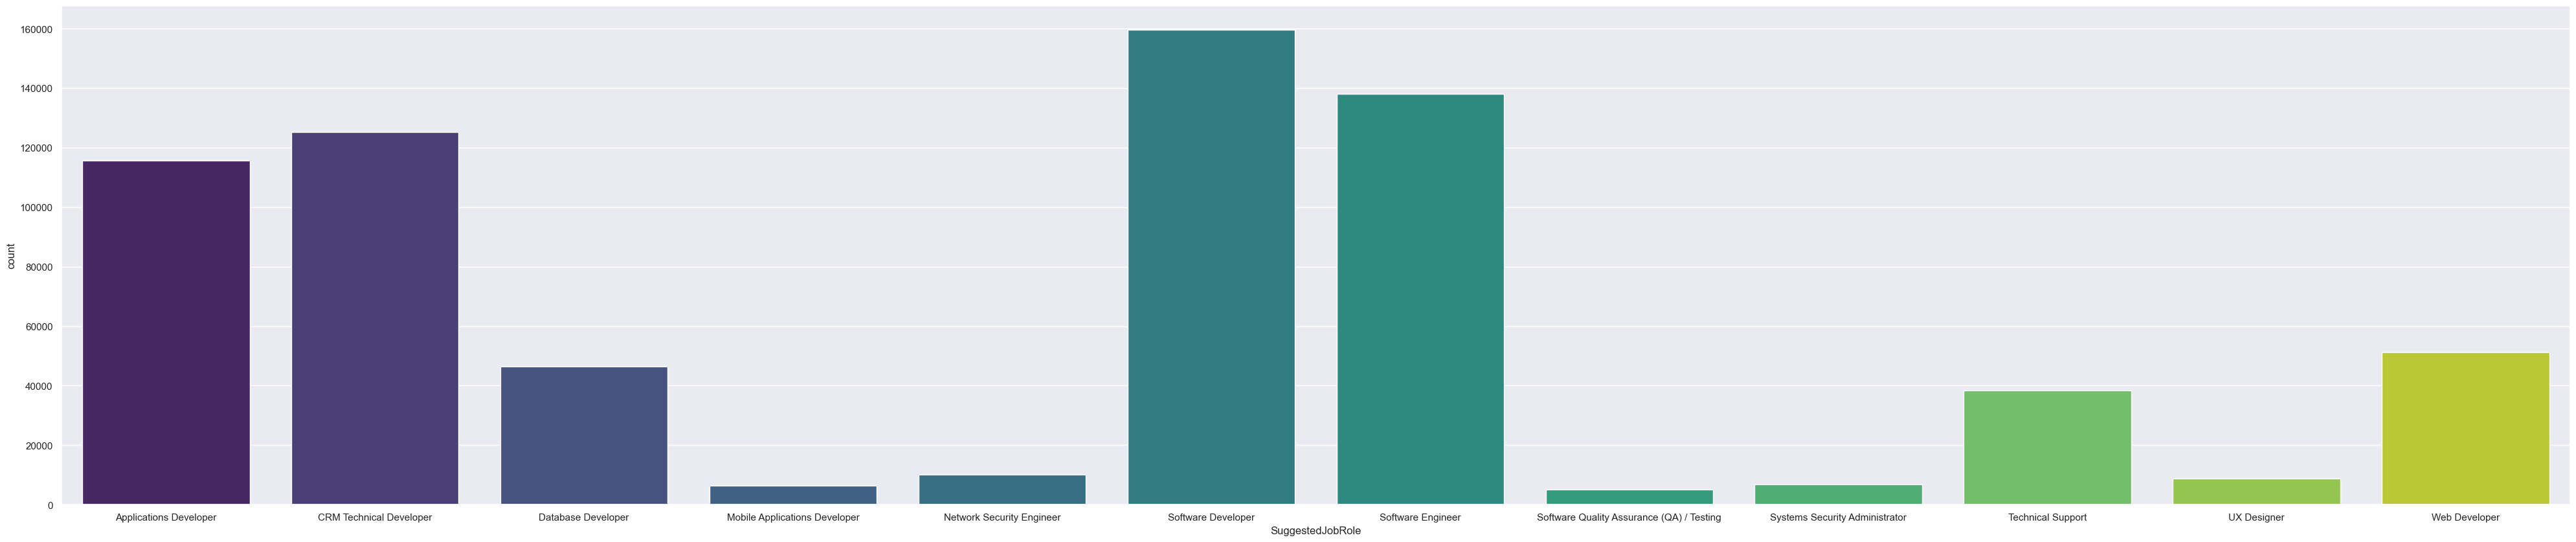

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x='SuggestedJobRole', data=combined_df, palette='viridis')

The graph indicates that roles like Software Engineer and Software Developer are in high

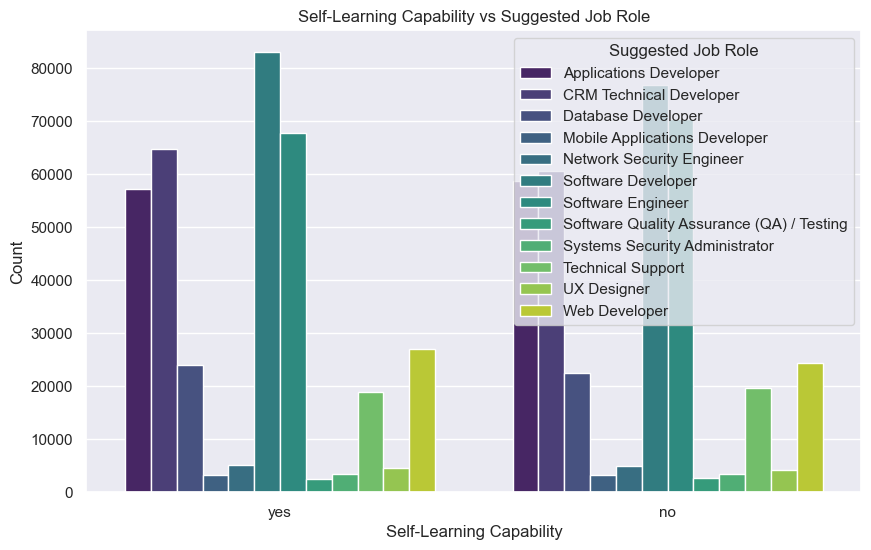

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='self-learning capability?', hue='SuggestedJobRole', data=combined_df, palette='viridis')
plt.title('Self-Learning Capability vs Suggested Job Role')
plt.xlabel('Self-Learning Capability')
plt.ylabel('Count')
plt.legend(title='Suggested Job Role', loc='upper right')
plt.show()

Web Developers, Software Developers, CRM Technical Developers, and Database Developers are roles that require strong self-learning capabilities.

In [23]:
! pip install -U seaborn matplotlib


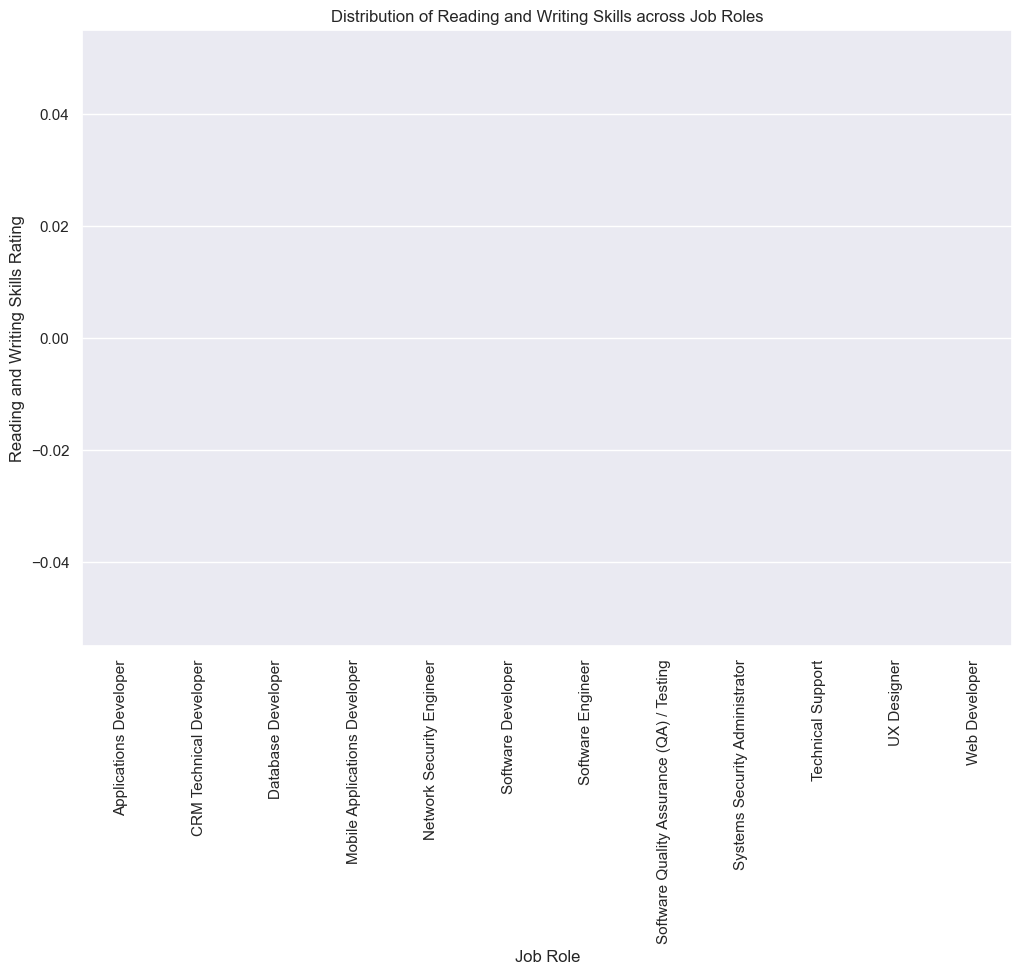

In [31]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='SuggestedJobRole', y='reading and writing skills', data=combined_df, cut=0)
plt.title('Distribution of Reading and Writing Skills across Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Reading and Writing Skills Rating')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


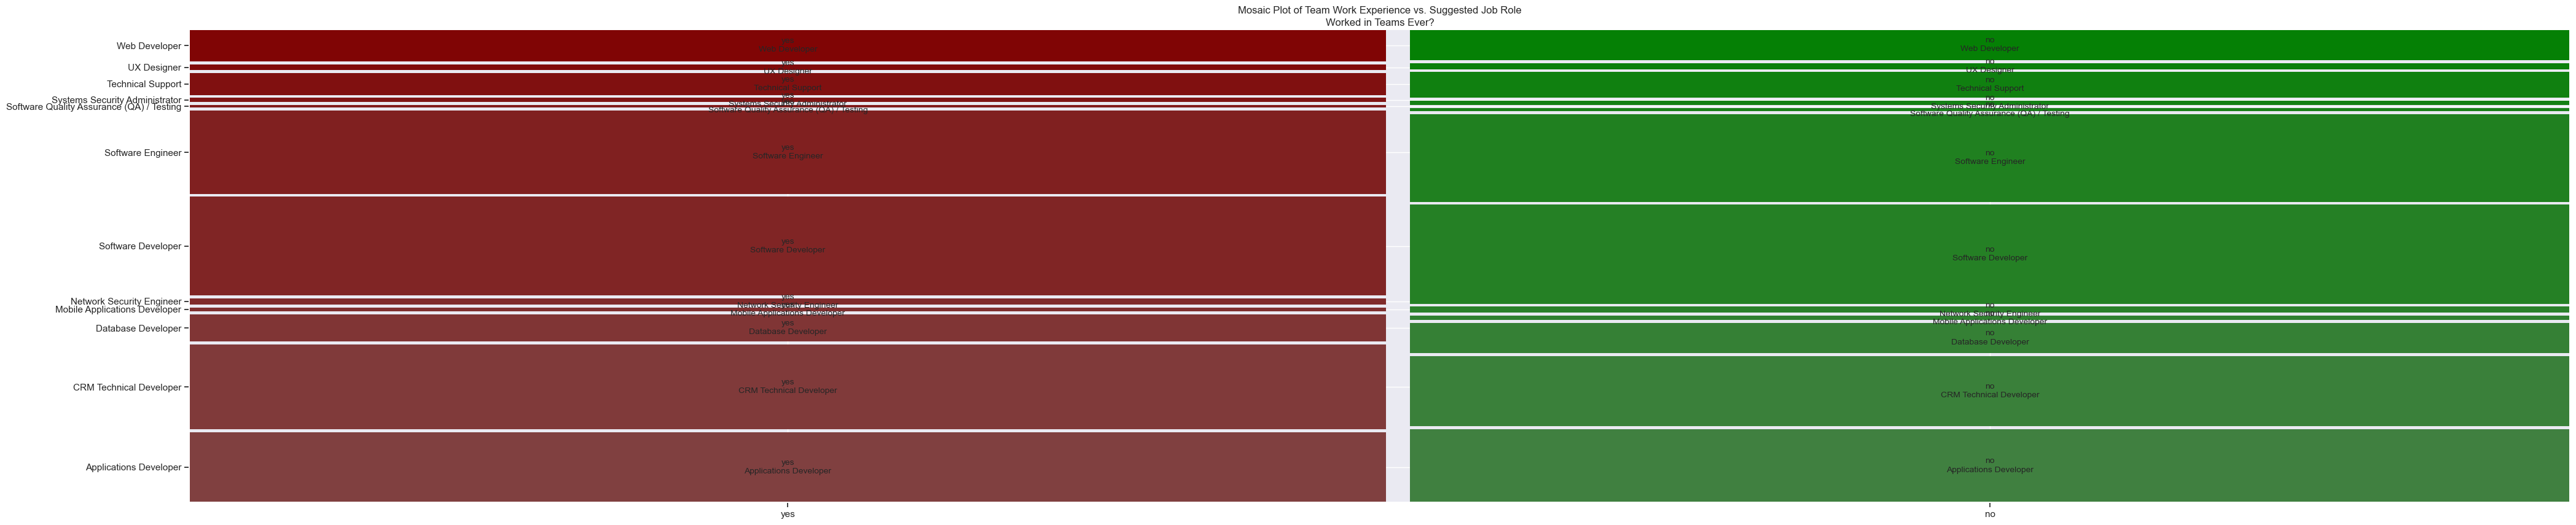

In [47]:
from statsmodels.graphics.mosaicplot import mosaic
props = {}
props[('Yes', 'Tech')] = {'color': 'blue'}
props[('Yes', 'Non-Tech')] = {'color': 'red'}
props[('No', 'Tech')] = {'color': 'green'}
props[('No', 'Non-Tech')] = {'color': 'orange'}

mosaic(combined_df, ['worked in teams ever?', 'SuggestedJobRole'], gap=0.01, properties=props)
plt.title('Mosaic Plot of Team Work Experience vs. Suggested Job Role')
plt.xlabel('Worked in Teams Ever?')
plt.ylabel('Suggested Job Role')
plt.show()

For job roles like "Web Developer" and "UX Designer", the proportion of candidates who have worked in teams ("yes") appears significantly larger than those who have not ("no").

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset here if not already loaded
# data = pd.read_csv('your_dataset.csv')
# combined_df = pd.read_csv('your_other_dataset.csv')

# Ensure 'reading and writing skills' is numeric
combined_df['reading and writing skills'] = pd.to_numeric(combined_df['reading and writing skills'], errors='coerce')

# Sort roles by median 'reading and writing skills'
sorted_roles = combined_df.groupby('SuggestedJobRole')['reading and writing skills'].median().sort_values().index

# Plot for Reading and Writing Skills across Job Roles
plt.figure(figsize=(12, 6))
sns.boxplot(x='reading and writing skills', y='SuggestedJobRole', data=combined_df, order=sorted_roles, palette='coolwarm')
plt.title('Reading and Writing Skills across Job Roles')
plt.xlabel('Reading and Writing Skills Rating')
plt.ylabel('Job Role')
plt.show()

# Stacked Bar Chart for Team Work across Job Roles
team_work_cross_tab = pd.crosstab(combined_df['SuggestedJobRole'], combined_df['worked in teams ever?'])
team_work_cross_tab = team_work_cross_tab.loc[sorted_roles]  # Use the same sorted order
plt.figure(figsize=(12, 6))
team_work_cross_tab.plot(kind='barh', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Team Work Experience across Job Roles')
plt.xlabel('Number of Candidates')
plt.ylabel('Job Role')
plt.legend(title='Worked in Teams')
plt.show()

# Swarm plot for Hackathon Participation
plt.figure(figsize=(12, 8))
sns.swarmplot(x='SuggestedJobRole', y='hackathons', data=combined_df, palette='coolwarm')  # Ensure correct dataset is used here
plt.title('Distribution of Hackathon Participation by Suggested Job Role')
plt.xlabel('Suggested Job Role')
plt.ylabel('Number of Hackathons Participated')
plt.xticks(rotation=45)
plt.show()


NameError: name 'combined_df' is not defined

<Axes: >

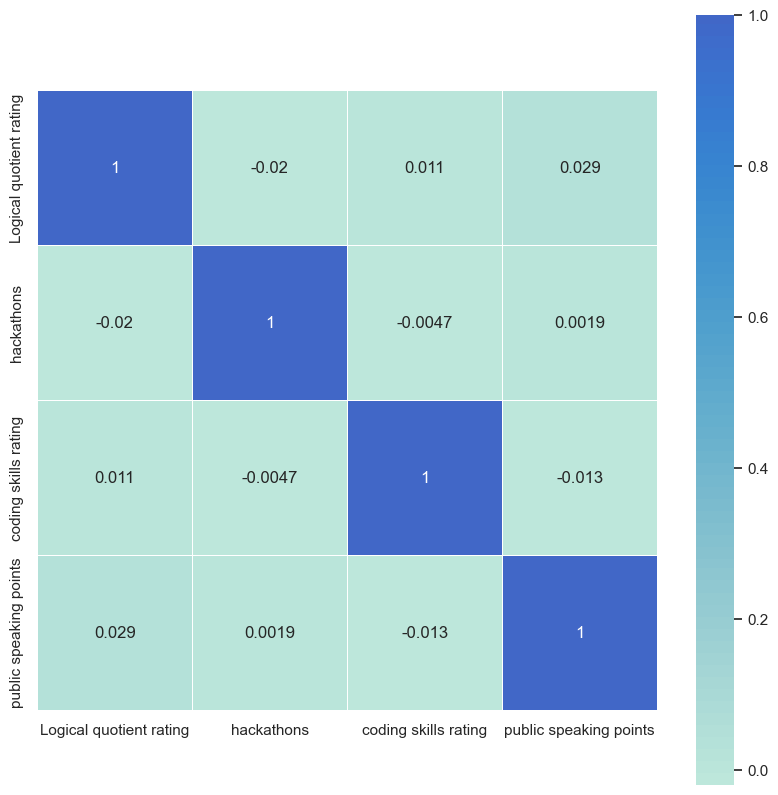

In [ ]:
corr = combined_df[['Logical quotient rating', 'hackathons','coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

No highly corelated numerical pair found

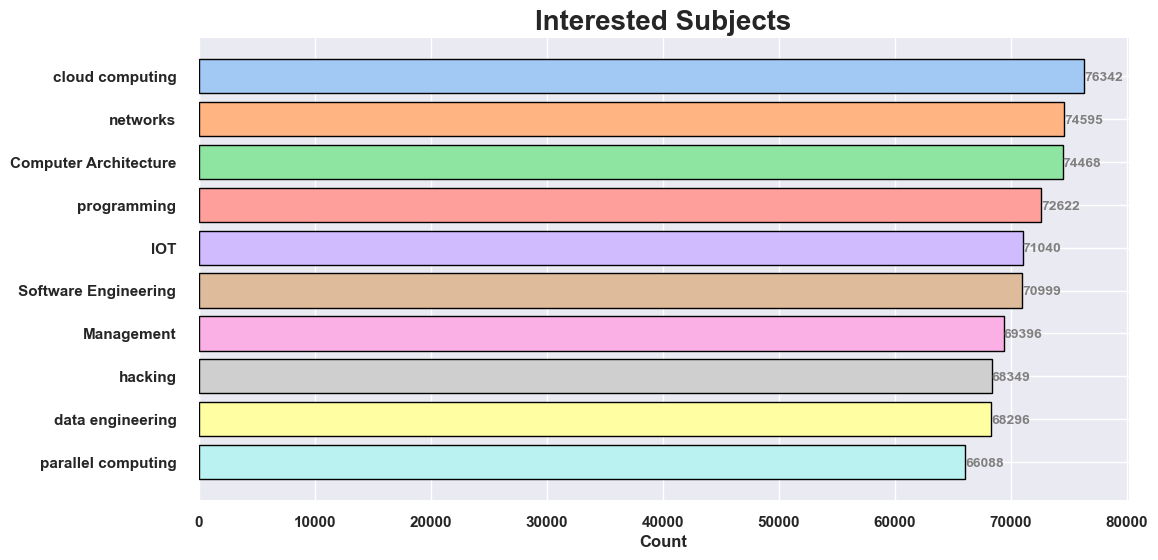

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=combined_df["Interested subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

ValueError: cannot convert float NaN to integer

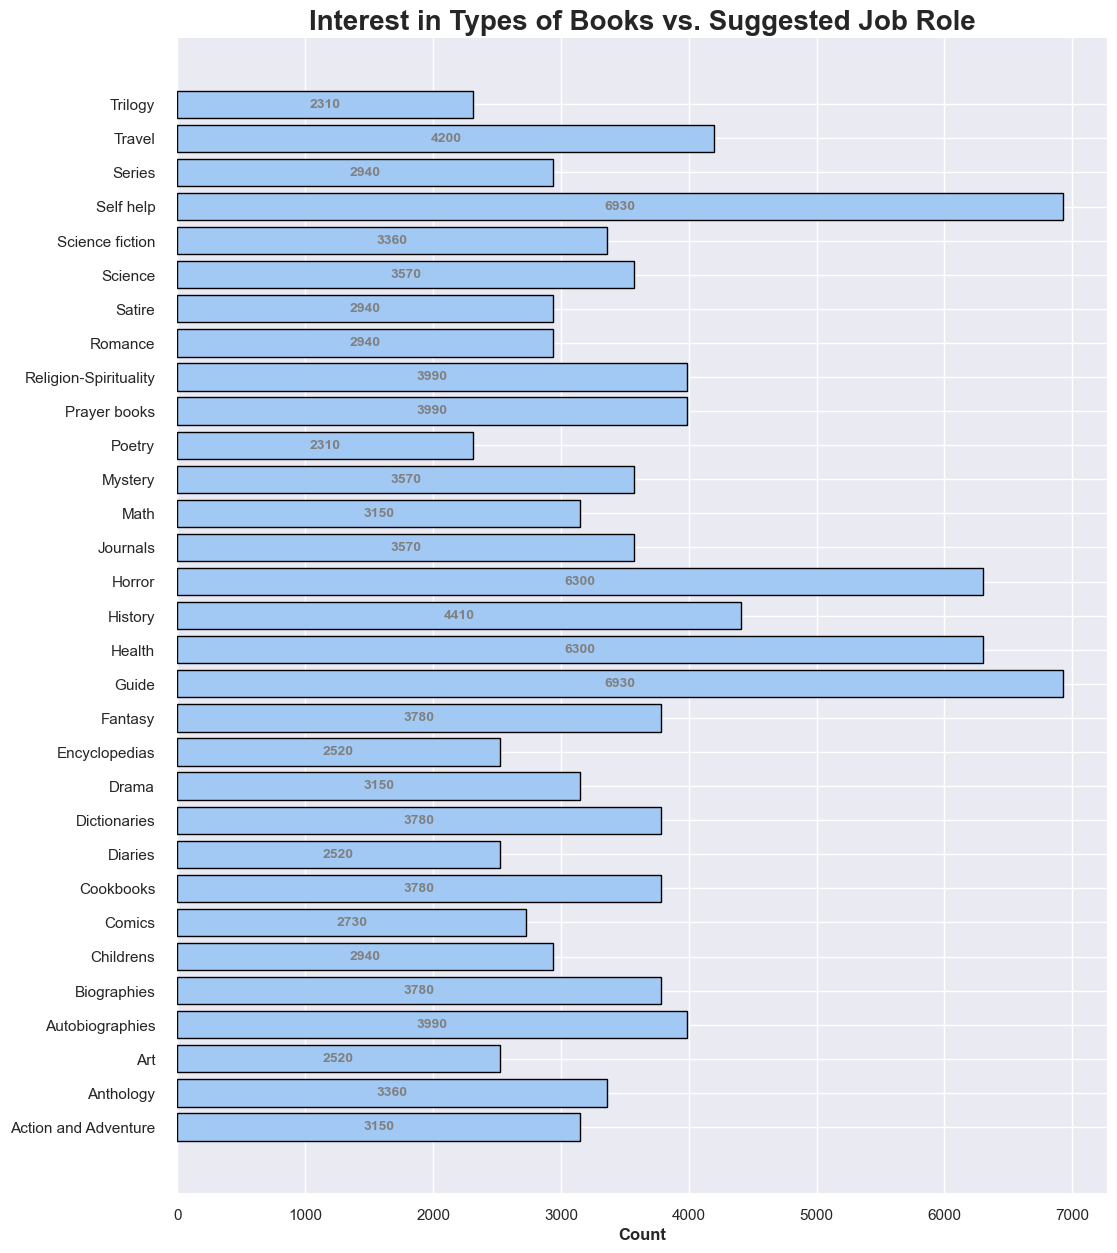

In [ ]:
book_job_crosstab = pd.crosstab(combined_df['Interested Type of Books'], combined_df['SuggestedJobRole'])

# Plot setup
fig, ax = plt.subplots(figsize=(12, 15))

# Colors for each job role
colors = sns.color_palette('pastel', len(book_job_crosstab.columns))

# Creating the grouped horizontal bar plot
bottoms = pd.Series([0] * len(book_job_crosstab))
for i, column in enumerate(book_job_crosstab.columns):
    ax.barh(book_job_crosstab.index, book_job_crosstab[column], left=bottoms, color=colors[i], edgecolor='black', label=column)
    bottoms += book_job_crosstab[column]

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.set_xlabel('Count', weight='bold')
ax.set_title('Interest in Types of Books vs. Suggested Job Role', weight='bold', fontsize=20)

# Adding value labels inside the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_y() + i.get_height()/2,
            str(round(i.get_width())), ha='center', va='center',
            fontsize=10, fontweight='bold', color='grey')

# Legend
ax.legend(title='Suggested Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')

# Invert y-axis to show the largest category on top
ax.invert_yaxis()

# Show the plot
plt.show()

In [62]:
for column in combined_df.columns:
    unique_values = combined_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in SuggestedJobRole: ['Applications Developer', 'CRM Technical Developer', 'Database Developer', 'Mobile Applications Developer', 'Network Security Engineer', ..., 'Software Quality Assurance (QA) / Testing', 'Systems Security Administrator', 'Technical Support', 'UX Designer', 'Web Developer']
Length: 12
Categories (12, object): ['Applications Developer', 'CRM Technical Developer', 'Database Developer', 'Mobile Applications Developer', ..., 'Systems Security Administrator', 'Technical Support', 'UX Designer', 'Web Developer']
Unique values in education-requirements: ['ms, computer science, degree, ba, ma, bachelor, science, engineering'
 'ms, computer science, degree, ba, ma, bachelor, science, business'
 'ma, ba, degree, bachelor, business' 'ms, ma, ba, engineering, business'
 'ba, bs, ma' 'ms, ma, ba, degree, bachelor' 'ma'
 'ms, ma, ba, degree, bachelor, engineering' 'ms, diploma, ma' 'ba, ma'
 'master, degree, ba, ma, bachelor, engineering, business' 'bs, ma'
 'ms, m

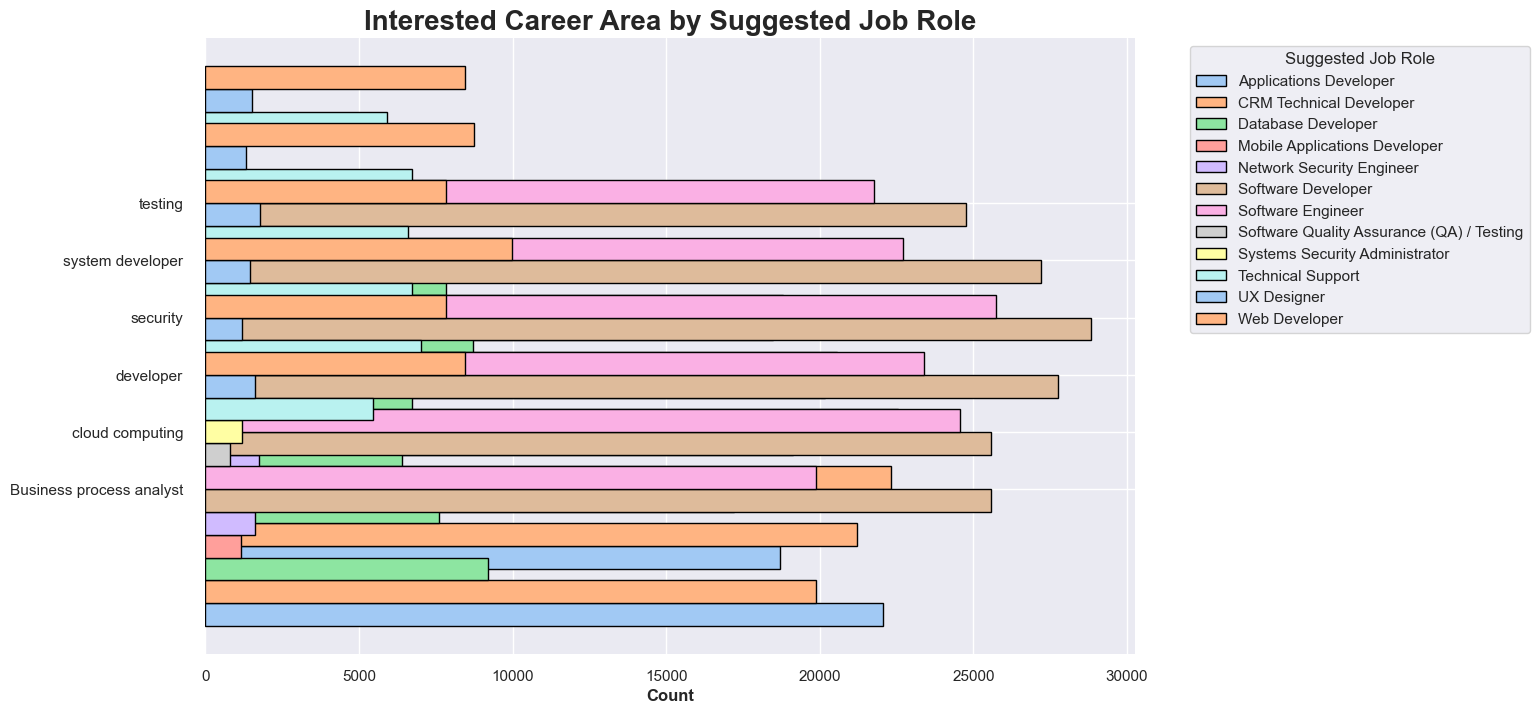

In [63]:
career_job_crosstab = pd.crosstab(combined_df['interested career area '], combined_df['SuggestedJobRole'])

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for each job role
colors = sns.color_palette('pastel', len(career_job_crosstab.columns))

# Creating the grouped horizontal bar plot
positions = range(len(career_job_crosstab))
width = 0.4  # Set the width of each bar

for i, column in enumerate(career_job_crosstab.columns):
    ax.barh([p + width*i for p in positions],
            career_job_crosstab[column], height=width, label=column, color=colors[i], edgecolor='black')

# Styling
ax.set_yticks([p + width*(len(career_job_crosstab.columns)-1)/2 for p in positions])
ax.set_yticklabels(career_job_crosstab.index)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

ax.set_xlabel('Count', weight='bold')
ax.set_title('Interested Career Area by Suggested Job Role', weight='bold', fontsize=20)

ax.legend(title='Suggested Job Role', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Software Engineers and Web Developers are found in many different career areas. This shows that these jobs are flexible and important in many parts of the tech industry.Other roles such as Systems Security Administrator and Network Security Engineer are more concentrated in specific areas like security



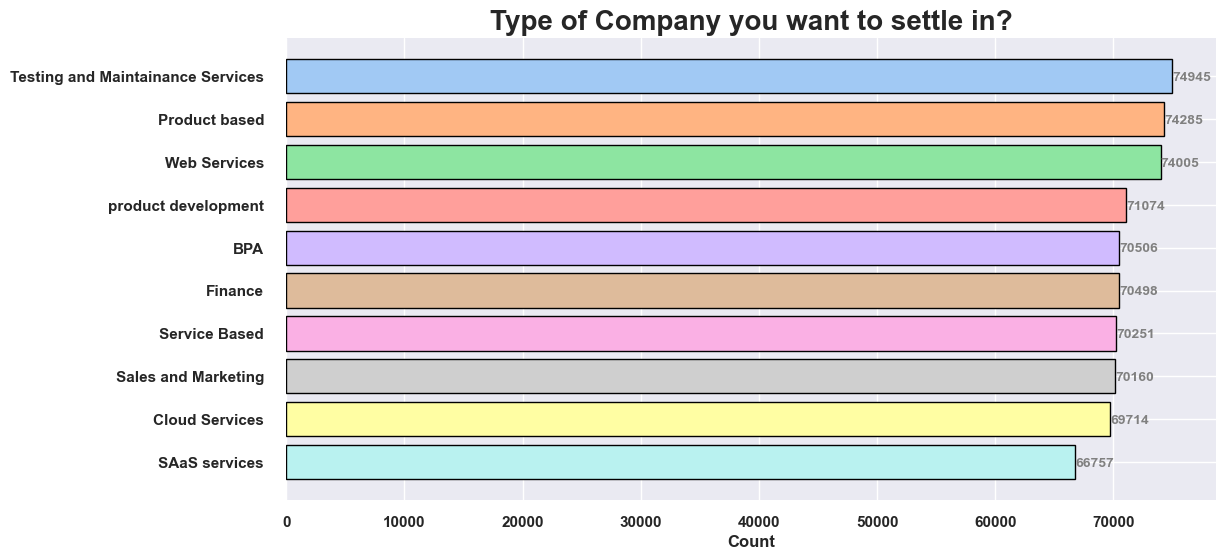

In [65]:
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=combined_df["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))


for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()